# Applying vision language models and image generation in a loop
In this notebook we apply a vision language model and an image generation model in a loop. The description generated by the vision model is passed to the image generation model as prompt. The resulting images are stored to disk.

In [1]:
import openai
from skimage.io import imread, imsave
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb

We define two helper functions for vision and image generation.

In [2]:
def prompt_dall_e(prompt:str, width:int=1024, height:int=1024, model='dall-e-3'):
    """
    Generate an image from a given prompt.
    """
    client = openai.OpenAI()

    response = client.images.generate(
      prompt=prompt,
      model=model,
      n=1,
      size=f"{width}x{height}"
    )

    image_url = response.data[0].url

    image = imread(image_url)[::2, ::2]

    return image

In [3]:
def prompt_chatGPT(prompt:str, image, model="gpt-4o"):
    """Sends a prompt and an image to openAI
    and returns the text response.
    """
    rgb_image = _img_to_rgb(image)
    byte_stream = numpy_to_bytestream(rgb_image)
    base64_image = base64.b64encode(byte_stream).decode('utf-8')

    message = [{"role": "user", "content": [{
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
        }
    }]}]
            
    # setup connection to the LLM
    client = openai.OpenAI()
    
    # submit prompt
    response = client.chat.completions.create(
        model=model,
        messages=message
    )
    
    # extract answer
    return response.choices[0].message.content

In [4]:
image_filename = "data/real_cat_00.png"

image = imread(image_filename)

## The loop

Next we run both function in a loop. The image description that is used for prompting the next image is printed between the images.

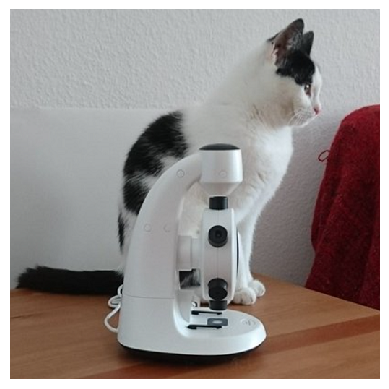

This is an image of a cat sitting very close to a microscope on a wooden surface. The cat appears to be looking off into the distance. The microscope is white and black and seems to be positioned behind the cat.


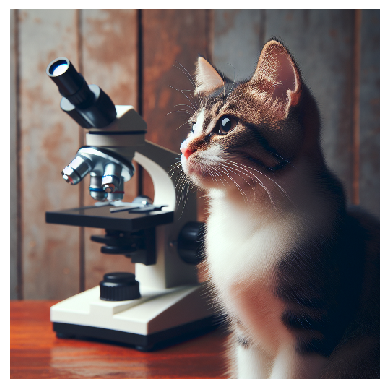

The image features a cute cat sitting next to a microscope. The background consists of a wooden surface, providing a cozy and rustic setting. The cat seems to be curiously observing the surroundings, perhaps hinting at an interest in science or exploration.


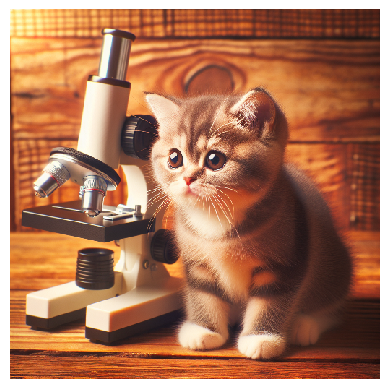

In the image, there's an adorable kitten sitting next to a microscope on a wooden surface. The kitten has a curious expression, possibly intrigued by the microscope. This scene combines elements of science and the endearing presence of a cat.


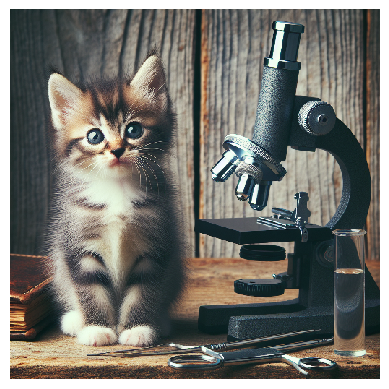

This image shows an adorable kitten sitting next to a microscope on a wooden surface. Around the microscope, there are various scientific instruments, including a glass vial and metal tools. The background is a wooden texture, giving the scene a cozy, rustic feel. The kitten appears to be curiously looking towards the viewer, adding a charming element to the otherwise scientific setting.


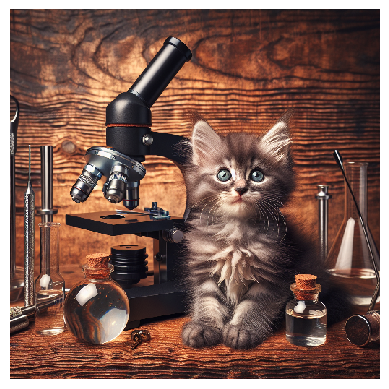

This is a delightful image of a kitten sitting next to a microscope in what appears to be a laboratory setting. The backdrop includes various scientific equipment such as glass beakers, test tubes, and flasks. The setting juxtaposes the scientific tools with the innocence of the kitten, creating an adorable and whimsical scene.


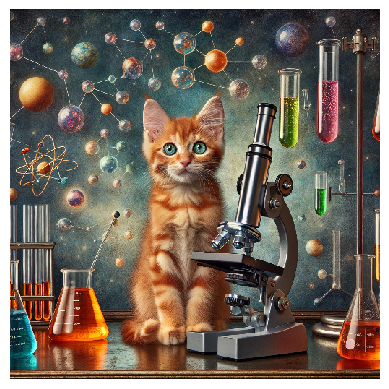

This is an adorable illustration of a kitten sitting on a laboratory table surrounded by scientific equipment, such as a microscope, beakers, and test tubes filled with colorful liquids. In the background, there is a fantastical depiction of molecular structures and planetary models, combining elements of chemistry, biology, and astronomy in a whimsical and imaginative way.


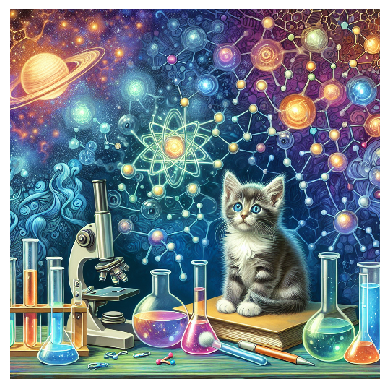

This image showcases a surreal and whimsical scene featuring a cute kitten sitting on a book amidst laboratory equipment such as test tubes, flasks, and a microscope. In the background, there is an imaginative representation of space and molecular structures, creating a blend of a scientific and cosmic theme. The colorful and detailed elements convey a sense of curiosity, discovery, and wonder.


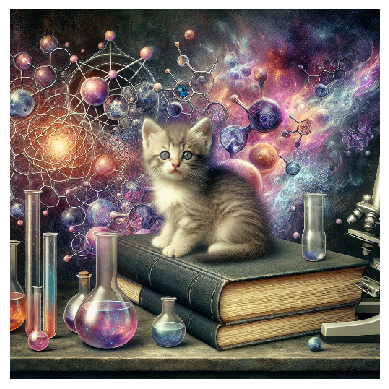

This image features an adorable kitten sitting on top of two large books. Surrounding the kitten are various scientific elements, including beakers filled with colorful liquids, a microscope, and a chalkboard filled with molecular diagrams. The background is a cosmic representation featuring vibrant colors and abstract patterns, giving the scene a whimsical and fantastical atmosphere. The combination of the kitten with the scientific and cosmic elements creates a delightful contrast, blending the cuteness of the kitten with the intrigue of science and the cosmos.


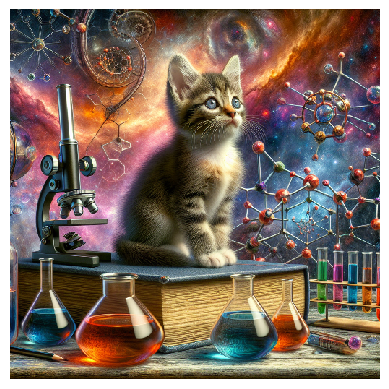

This image features a kitten sitting atop a stack of books surrounded by various science-related objects, such as a microscope, beakers, and test tubes filled with colorful liquids. The background is a vibrant, cosmic scene with elements of space, including stars, galaxies, and molecular structures. The artwork combines themes of science, curiosity, and the wonders of the universe, creating a whimsical and imaginative scene.


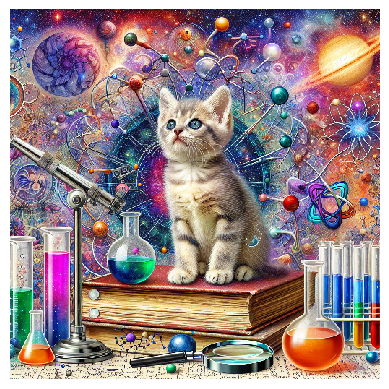

This image features a cute kitten sitting on top of a stack of books. Surrounding the kitten are various pieces of scientific equipment, including test tubes, beakers, and a microscope. The background is a colorful, fantastical representation of outer space and atomic structures, with swirling galaxies, planets, and molecular diagrams, giving it a whimsical and scientific feel. The image combines elements of curiosity and exploration with the innocence and charm of the kitten.


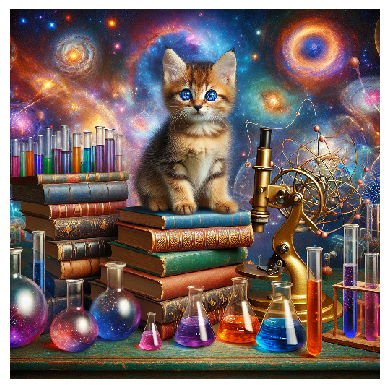

This whimsical image features a kitten sitting on a stack of books surrounded by various scientific equipment such as beakers, flasks, and test tubes filled with colorful liquids. In the background, a vibrant and fantastical cosmic scene unfolds with swirling colors, stars, and galaxies, creating a magical atmosphere that blends science with imagination. The overall effect is charming and intriguing, evoking a sense of curiosity and wonder.


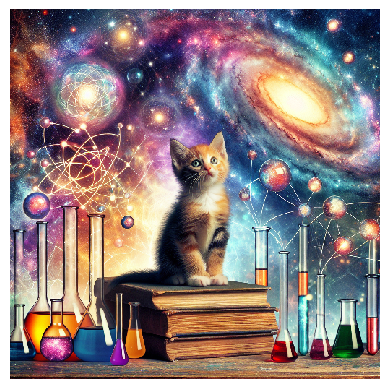

This whimsical image showcases a kitten sitting on a few old-looking, stacked books. Surrounding it are various colorful scientific laboratory glassware, such as beakers and test tubes. The background features a mesmerizing, cosmic scene with bright, vibrant galaxies, planets, and abstract representations of chemical structures and atomic models. The combination of the kitten, the scientific apparatus, and the fantastical space backdrop creates a charming, imaginative composition that merges themes of curiosity, science, and the universe.


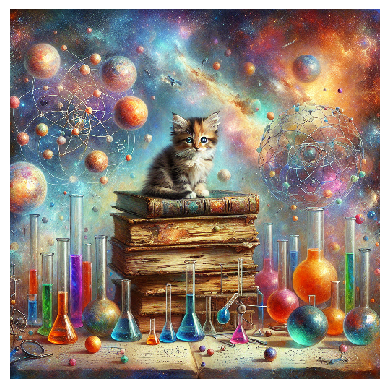

This image depicts a surreal and imaginative scene in which a kitten is sitting on top of a stack of old books. The background is an abstract cosmic setting with swirling galaxies in an array of vibrant colors, combined with various elements of chemistry and physics. There are numerous scientific instruments such as beakers, flasks, and test tubes filled with colorful liquids scattered around the books. Additionally, there are intricate patterns and structures resembling molecules and atomic models floating in the space around the kitten. The overall image blends themes of science and fantasy, creating a whimsical and magical atmosphere.


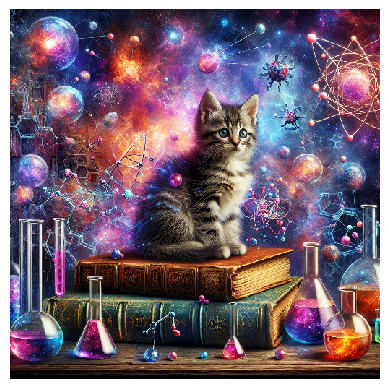

In this whimsical, surreal image, a kitten is sitting on a stack of old books. Surrounding the kitten are various scientific paraphernalia, such as beakers, test tubes, and molecular models. The background is a vibrant cosmic scene filled with colorful galaxies, stars, and abstract representations of molecular structures. The combination of the cute kitten, classic books, and the scientific and cosmic elements creates a fantastical and imaginative atmosphere.


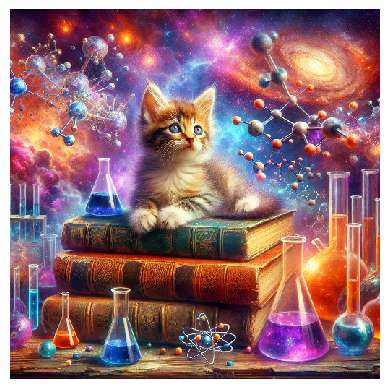

This image features a fantasy scene with a cute kitten sitting on top of a stack of old books. Surrounding the kitten are various colorful laboratory flasks filled with different colored liquids. The background is a cosmic, nebula-like scenery with vibrant colors of pink, purple, and blue, and it includes images of atomic structures and molecules, giving a whimsical scientific feel. The overall atmosphere combines themes of science and fantasy, creating a magical and enchanting composition.


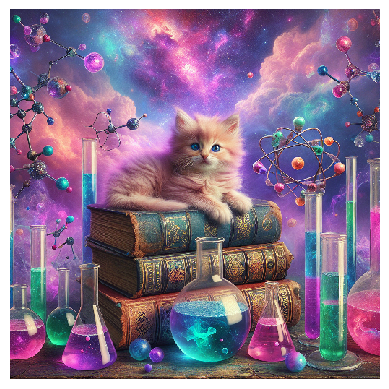

This is a whimsical and fantastical image featuring a fluffy kitten sitting atop a stack of old books. Surrounding the kitten are various scientific elements such as beakers, flasks filled with colorful liquids, atomic models, and molecular structures. The background is an ethereal, cosmic sky filled with vibrant colors and galaxies, blending the themes of science and fantasy. The overall effect is magical and enchanting, combining elements of a laboratory with a dreamy, otherworldly atmosphere.


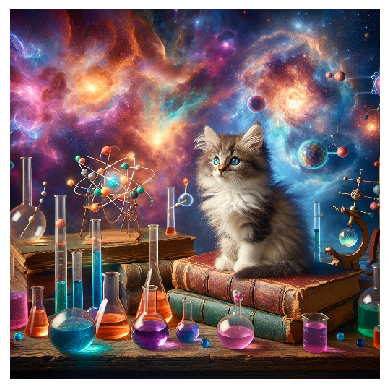

This image is a whimsical and colorful illustration featuring a kitten in a fantastical laboratory setting. The kitten is sitting on top of a stack of old books, surrounded by various laboratory equipment such as beakers, test tubes, and flasks filled with vibrant, glowing liquids. The background features a cosmic scene, complete with swirling nebulae and galaxies, giving the image a magical and otherworldly feel. There are also scientific symbols and models, like atom diagrams, adding to the theme of a curious kitten in a mystical science lab.


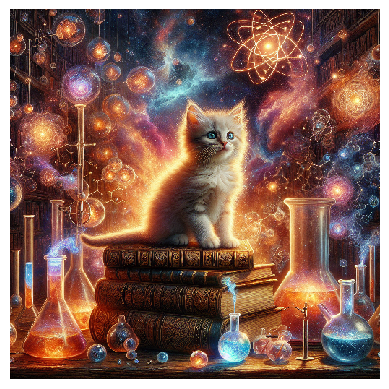

This digital artwork features a fluffy orange kitten sitting on a stack of old books, surrounded by various laboratory glassware filled with colorful glowing liquids. The background is an enchanting, cosmic scene filled with galaxies, stars, and chemical structures, creating a whimsical blend of science and fantasy. The kitten appears to be curiously observing the fantastical elements around it. The overall color scheme combines warm and cool tones, enhancing the magical atmosphere of the scene.


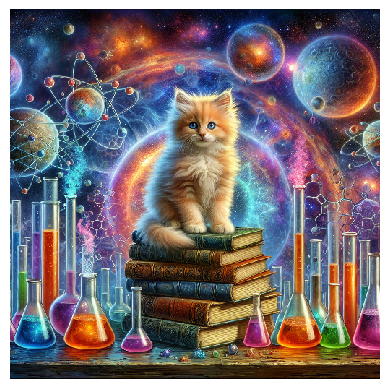

This is a whimsical and imaginative illustration featuring a cute orange kitten sitting on top of a stack of books. Surrounding the kitten are a variety of scientific glassware containing colorful liquids, adding a sense of curiosity and experimentation to the scene. The background is an outer space setting with planets, stars, and various scientific symbols and diagrams, giving the image a fantastical and cosmic atmosphere. The combination of the kitten, scientific elements, and space theme creates a playful and enchanting composition.


In [5]:
for i in range(1, 20):
    stackview.imshow(image)
    
    description = prompt_chatGPT("Describe this image.", image)
    
    print(description)
    
    image = prompt_dall_e(description)
    
    imsave(image_filename.replace("_00.png", f"_{i:02}.png"), image)